In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
seed = 0
n_samples = 10000
n_features = 2
n_hstates = 3

In [3]:
rnd = np.random.RandomState(seed)

## Bernoulli HMM

In [4]:
from kerasy.ML.HMM import BernoulliHMM

In [5]:
model = BernoulliHMM(n_hstates, random_state=seed)

In [6]:
samples = rnd.rand(n_samples, 1).round().astype(int)

In [7]:
model.fit(samples)

BernoulliHMM (Baum-Welch) 02/10 [####----------------]  20.00% - 0.091s  log probability: -6932.359137050144

In [8]:
model.params()

| Parameter |   Value|
----------------------
| n_hstates |       3|
| init      |  random|
| algorithm | viterbi|
| up_params |     ite|
| n_states  |       2|


In [9]:
model.emission

array([[0.62268276, 0.37731724],
       [0.68768748, 0.31231252],
       [0.06198365, 0.93801635]])

- `emission[k,0]` is **succes/yes probability** when hidden state is $k$.
- `emission[k,1]` is **failure/no probability** when hidden state is $k$.

Algorithm: viterbi


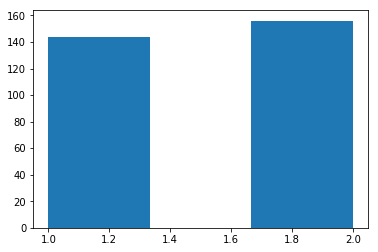

In [10]:
plt.hist(model.predict(samples[0:300]), bins=n_hstates)
plt.show()

In [11]:
samples[0:300] = samples[0]

In [12]:
model.fit(samples)

BernoulliHMM (Baum-Welch) 02/10 [####----------------]  20.00% - 0.088s  log probability: -6919.715264595409

In [13]:
model.emission

array([[0.40315904, 0.59684096],
       [0.60127766, 0.39872234],
       [0.05677903, 0.94322097]])

Algorithm: viterbi
Algorithm: viterbi


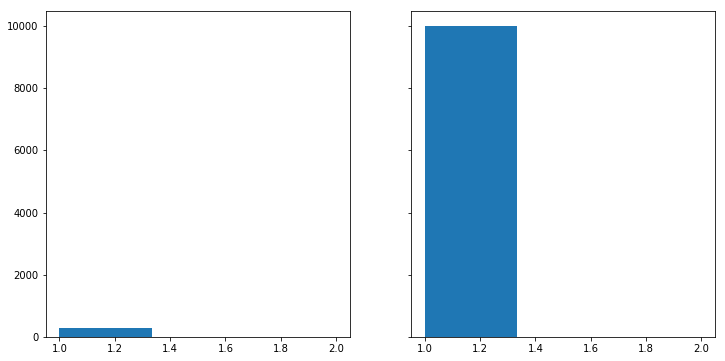

In [14]:
fig, (axL,axR) = plt.subplots(1, 2, sharey=True, figsize=(12,6))
axL.hist(model.predict(samples[0:300]), bins=n_hstates)
axR.hist(model.predict(samples), bins=n_hstates)
plt.show()

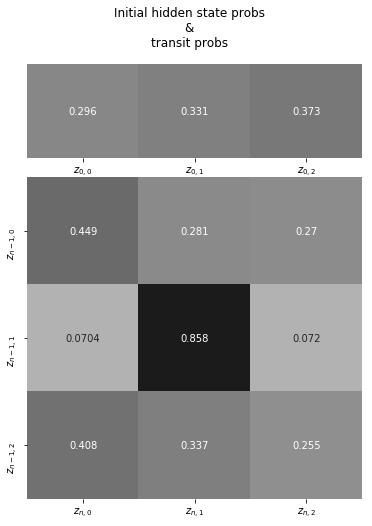

In [15]:
model.heatmap_params()

## Multinomial HMM

In [16]:
from kerasy.ML.HMM import MultinomialHMM

In [17]:
model = MultinomialHMM(n_hstates, random_state=seed)

In [18]:
samples = rnd.uniform(low=0, high=3, size=(n_samples,1)).round().astype(int)

In [19]:
model.fit(samples)

MultinomialHMM (Baum-Welch) 02/10 [####----------------]  20.00% - 0.090s  log probability: -13372.824284845465

In [20]:
model.params()

| Parameter |   Value|
----------------------
| n_hstates |       3|
| init      |  random|
| algorithm | viterbi|
| up_params |     ite|
| n_states  |       4|


Algorithm: viterbi


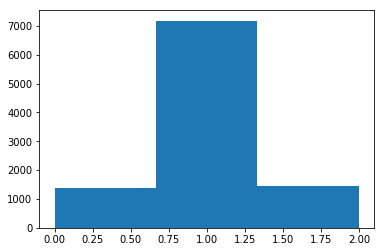

In [21]:
plt.hist(model.predict(samples), bins=n_hstates)
plt.show()

## Binomial HMM

In [22]:
from kerasy.ML.HMM import BinomialHMM

In [23]:
model = BinomialHMM(n_hstates, random_state=seed)

In [24]:
samples = rnd.uniform(low=1,high=100, size=(n_samples, n_features)).astype(int)

In [25]:
model.fit(samples)

BinomialHMM (Baum-Welch) 02/10 [####----------------]  20.00% - 0.056s  log probability: -73443.66196100312

In [26]:
model.params()

| Parameter |   Value|
----------------------
| n_hstates |       3|
| init      |  random|
| algorithm | viterbi|
| up_params |     itθ|


Algorithm: viterbi


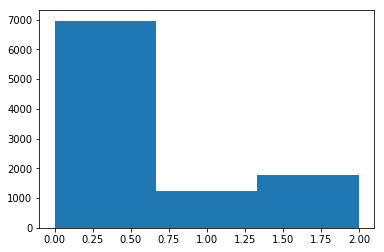

In [27]:
plt.hist(model.predict(samples), bins=n_hstates)
plt.show()

## Gaussian HMM

In [28]:
from kerasy.ML.HMM import GaussianHMM
from kerasy.ML.HMM import COVARIANCE_TYPES

In [29]:
from kerasy.utils import findLowerUpper

In [30]:
covs = [
    np.eye(2)*2,
    np.full(fill_value=0.3, shape=(2,2)) + np.eye(2),
    rnd.rand(2,2),
]
means = [
    [-3,-4],
    [-1, 3],
    [ 2, 1],
]
Ns = [n_samples//n_hstates for _ in range(n_hstates)]

In [31]:
samples = np.concatenate([rnd.multivariate_normal(mean=means[k], cov=covs[k], size=Ns[k]) for k in range(n_hstates)])
labels = np.concatenate([[k for _ in range(n)] for k,n in enumerate(Ns)])

/Users/iwasakishuto/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """Entry point for launching an IPython kernel.


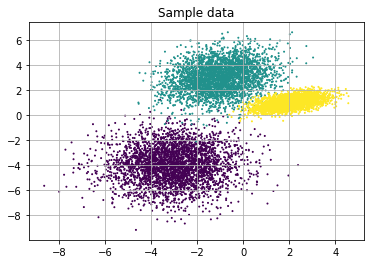

In [32]:
plt.scatter(samples[:,0], samples[:,1], c=labels, s=1)
plt.title("Sample data"), plt.grid()
plt.show()

In [33]:
(xmin,ymin),(xmax,ymax) = findLowerUpper(samples)
Xs,Ys = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
XYs = np.c_[Xs.ravel(),Ys.ravel()]

**The difference by `covariance_type`**

In [34]:
from kerasy.utils import galleryplot
from scipy import stats

In [35]:
def plot_func(ax, cov_type):
    model = GaussianHMM(n_hstates, covariance_type=cov_type, random_state=seed)
    model.fit(samples, verbose=-1)
    Zs = np.sum([stats.multivariate_normal(
        model.means[k], 
        model.covariances[k]
    ).pdf(XYs) for k in range(n_hstates)], axis=0).reshape(Xs.shape)
    
    ax.pcolor(Xs,Ys,Zs,alpha=0.3, cmap="jet")
    ax.set_title(cov_type, fontsize=16)

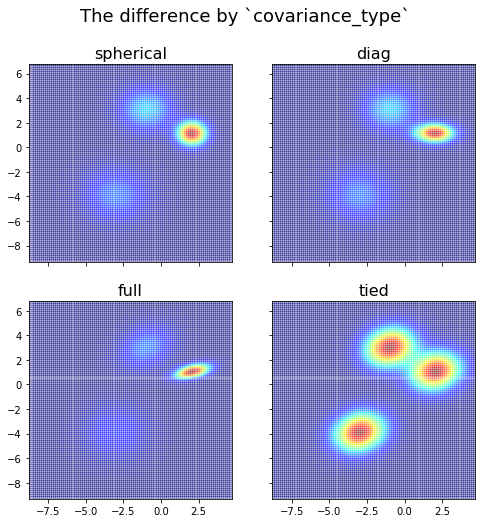

In [36]:
fig, axes = galleryplot(plot_func, argnames="cov_type", ncols=2, iterator=COVARIANCE_TYPES, sharex="all", sharey="all")
fig.suptitle("The difference by `covariance_type`", fontsize=18)
plt.show()